# Быстрый экскурс в LLM

**LLM (Large Language Model)** — это продвинутый искусственный интеллект, который умеет понимать и генерировать человеческий язык. Проще говоря, это как очень умный виртуальный помощник, который “прочитал” огромное количество книг, статей и других текстов в интернете. Это мощный инструмент, который помогает нам решать различные задачи: от написания писем до программирования. При этом он может ошибаться, поэтому всегда стоит проверять полученную информацию.

Модели заточены под конкретные доменные области и задачи, у них есть память, но она ограничена набором данных, на которых ее обучали.

По этой причине их так много, каждая модель решает свою задачу.

Есть генерализированные модели, но они все равно ограничены, в конечном счете умеют делать что-то лучше, а что-то хуже.

В публичном доступе есть каталоги существующих моделей с их описанием и бенчмарками: https://huggingface.co/models

**Prompt Engineering** — это искусство правильно задавать вопросы искусственному интеллекту, чтобы получать нужные ответы. Представьте, что вы разговариваете с очень умным, но немного «тугодумным» другом — если задать вопрос невнятно, он может не понять или ответить не то, что вы хотели.

Когда вы общаетесь с языковой моделью (например, ChatGPT или YandexGPT), от качества вашего запроса зависит качество ответа. Если спросить неправильно, модель может: Дать неверный ответ, упустить важные детали, запутаться в задаче, ответить слишком общей фразой.

Чем лучше вы научитесь составлять запросы, тем более полезные и точные ответы будете получать от языковых моделей.

<img src="https://i.ibb.co/WWMgTwBm/Screenshot-2025-10-05-at-18-29-30.png" alt="Screenshot-2025-10-05-at-18-29-30" width="800">

[Yandex Cloud: Руководство по проектированию промтов](https://yandex.cloud/ru/docs/ai-studio/gpt-prompting-guide/about])

## Как сравнивать это многообразие моделей?

Размер модели LLM определяется несколькими ключевыми параметрами:

### Основные метрики размера:

#### 1. Количество параметров

- Это главная метрика для определения "размера" модели
- Измеряется в миллионах (M), миллиардах (B) или триллионах (T) параметров
- Например: GPT-3.5 (175B параметров), GPT-4 (1.7T параметров), Claude-3 (200B параметров)

#### 2. Размер контекстного окна

- Количество токенов, которое модель может обработать за один раз
- Измеряется в тысячах токенов (1K, 4K, 32K, 128K, 1M+)
- Влияет на способность работать с длинными текстами

### Что считается "большой" моделью:

- **Малые модели**: до 10B параметров (например, LLaMA-7B)
- **Средние модели**: 10B-100B параметров
- **Большие модели**: 100B-1T параметров
- **Очень большие модели**: свыше 1T параметров

#### Практические показатели:

- Объем обучающих данных (в токенах)
- Вычислительные ресурсы для обучения (GPU-часы)
- Размер файла модели на диске (GB/TB)

Чем больше параметров, тем теоретически выше способность модели к пониманию и генерации текста, но также выше требования к вычислительным ресурсам.

Таким образом для выбора подходящей модели можно опираться на практические показатели
и серию проведенных экспериментов (promt-engineering) в рамках своих необходимых сценариев, то есть валидация ожиданий с полученным ответом от конкретной модели.
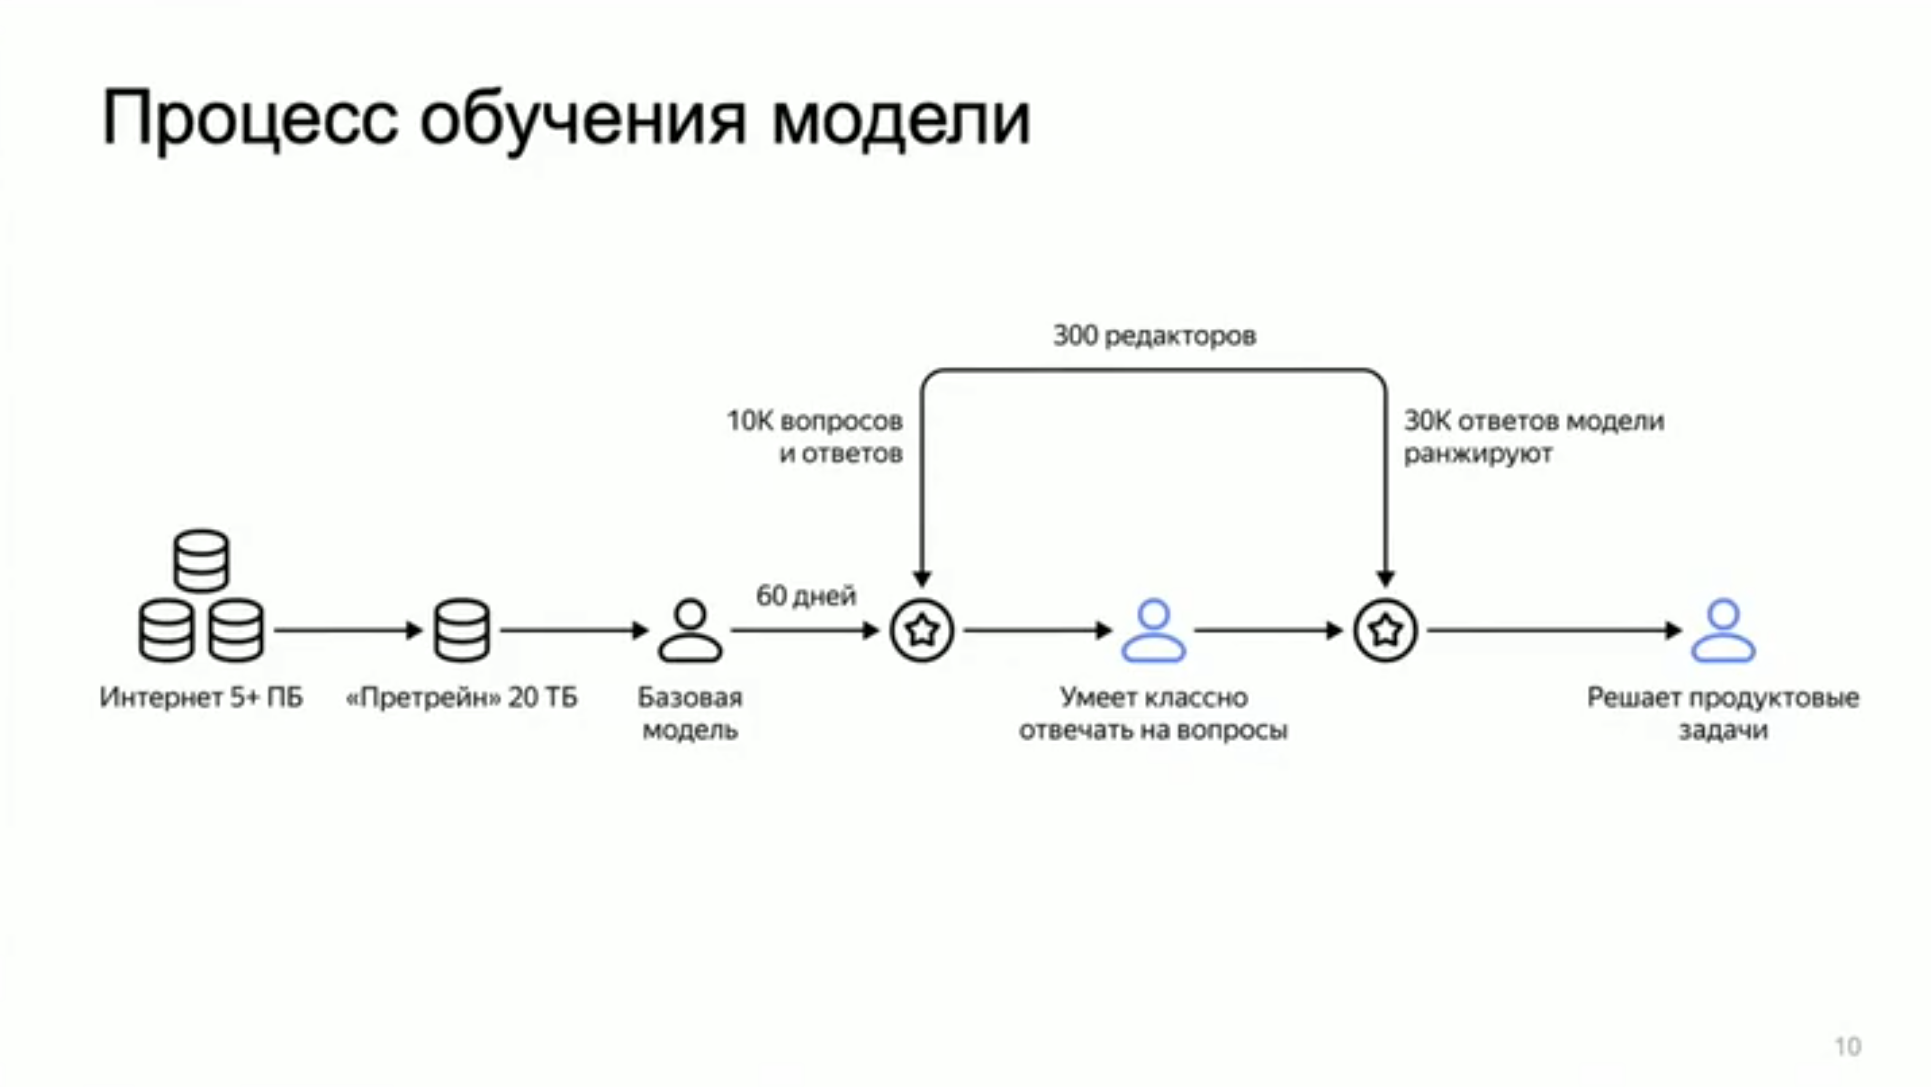
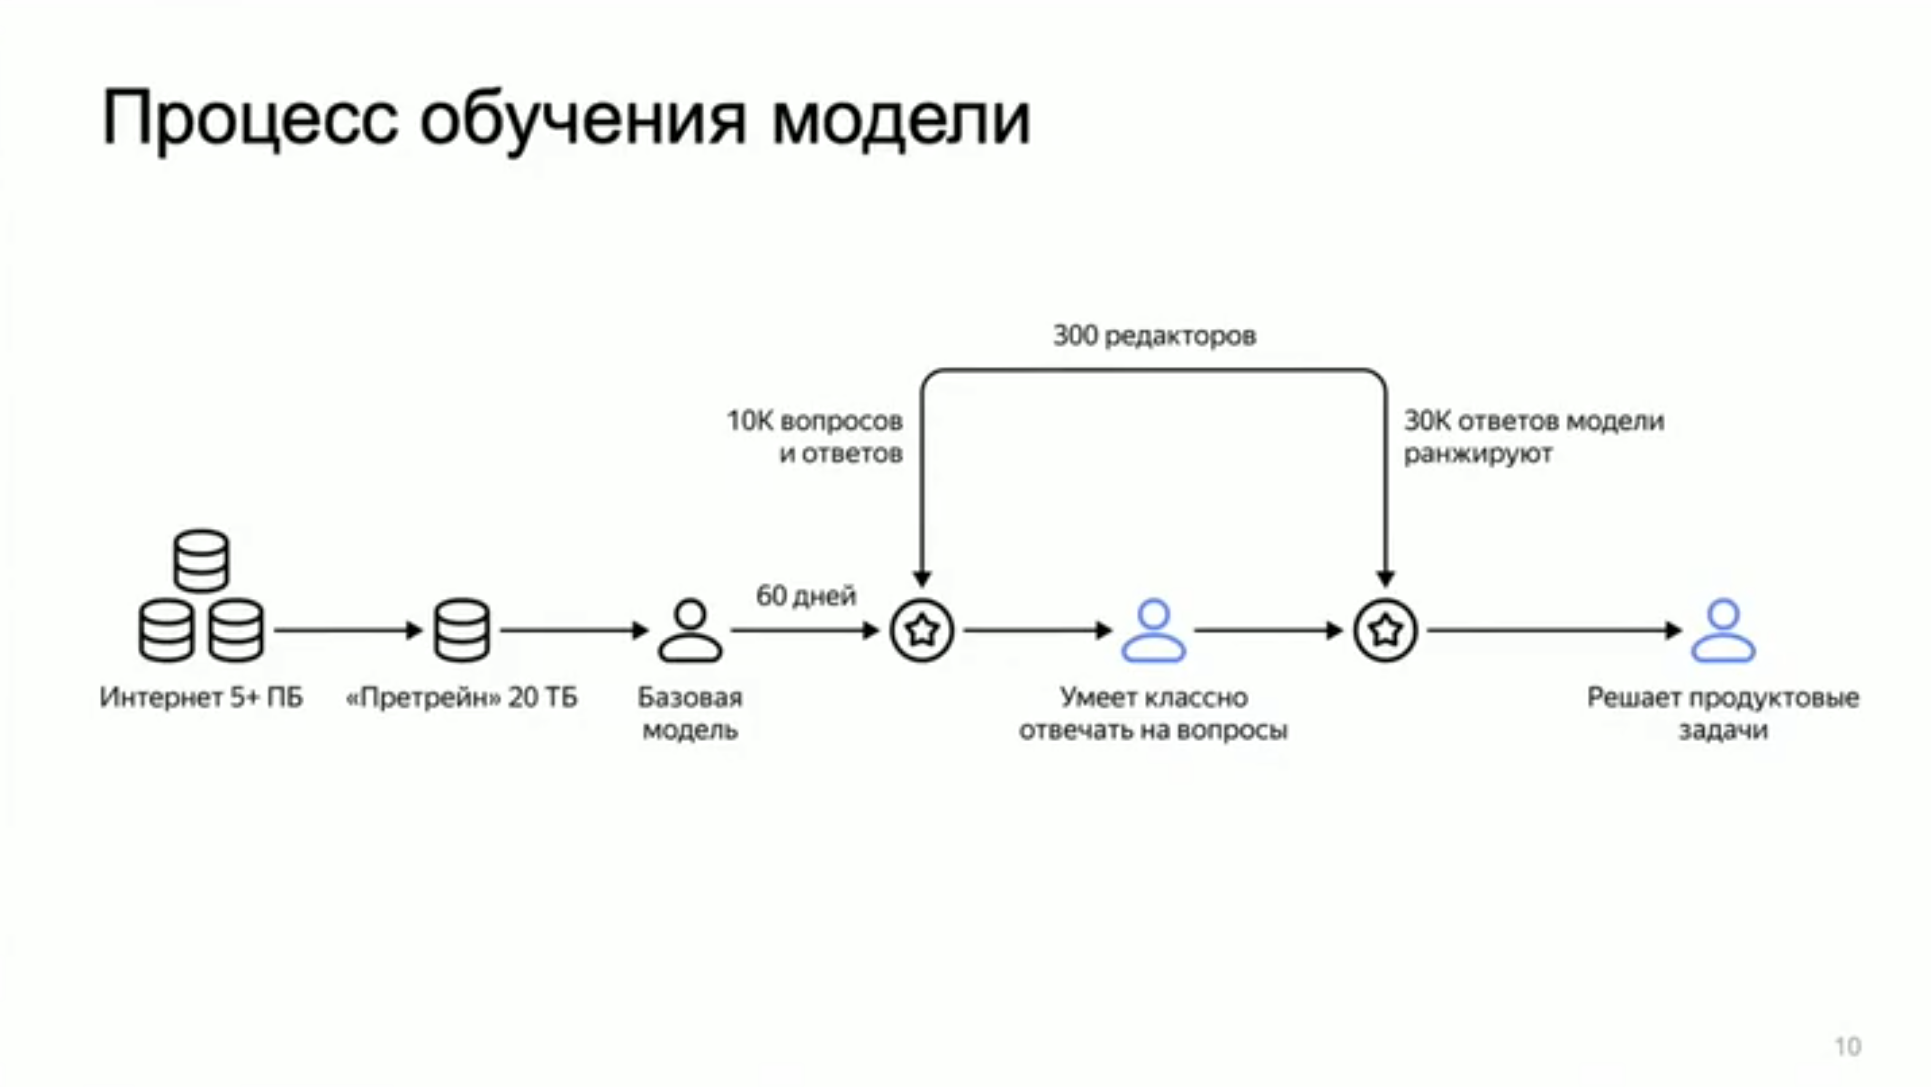
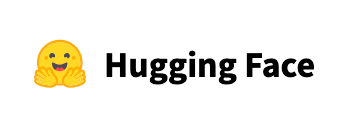

# Практический пример. Модель в вакууме: Попробуем уточнить какие-то специфические вопросы

In [1]:
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.Http
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.YandexLlmModelsApi
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.askOpenAiModel

YandexLlmModelsApi.Http().askOpenAiModel {
    cloudFolder { "b1gioucfterb2rnsqb1q" }
    llmModel { "gpt-oss-20b" }

    systemPromt {
        """
        Ты - дежурный поддержки разработки очень крутой команды подписочной тарифной сетки.
        Твоя задача по известным источникам данных объяснить причину недоступности той или иной подписки пользователю.
        Отвечай максимально просто и понятно, так как в поддержку обращаются люди, которые ничего не знает про доменную область очень крутой команды подписочной тарифной сетки.
        Ничего не придумывай, используй только ту информацию, которая тебе доступна.
        """
    }

    userMessage { "Почему пользователю с uid 708 не доступна подписка standart.subscription.tariff?" }
}

Я не могу точно сказать, почему подписка **standart.subscription.tariff** недоступна для пользователя с uid 708, потому что у меня нет доступа к внутренним данным о его аккаунте, региону, статусу оплаты и т.д.  

Если вы можете уточнить, например:

- где находится пользователь (регион/страна);
- был ли у него ранее активированная подписка;
- какие ограничения применяются к его тарифу;

— я смогу дать более точный ответ.

# Практический пример. Модель в вакууме: Поможем модели с помощью императивного обогащения контекста в рамках запроса

В данном сценарии допустим у нас есть какая-то заранее известная форма с данными, мы как-то эти данные распарсили из формы, заранее сходили в известные нам источники данных, дали их модели и попросили суммарзировать ответ для пользователя по определенным правилам.

In [3]:
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.Http
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.YandexLlmModelsApi
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.askOpenAiModel
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoCatalogueSubscription
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoSubscriptionsCatalogueDao
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoUserSubscription
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoUserSubscriptionsDao

val userSubscriptionsDao = MongoUserSubscriptionsDao()
val catalogueSubscriptionsDao = MongoSubscriptionsCatalogueDao()

fun MongoUserSubscription.toText() = """
    Подписка пользователя: $uid
    Название подписки: $subscriptionName
    Фичи подписки: $features
""".trimIndent()

fun MongoCatalogueSubscription.toText() = """
    Название подписки в каталоге: $subscriptionName
    Фичи подписки: $features
""".trimIndent()

YandexLlmModelsApi.Http().askOpenAiModel {
    cloudFolder { "b1gioucfterb2rnsqb1q" }
    llmModel { "gpt-oss-20b" }

    systemPromt {
        """
        Ты - дежурный поддержки разработки очень крутой команды подписочной тарифной сетки.
        Твоя задача по известным источникам данных объяснить причину недоступности той или иной подписки пользователю.
        Отвечай максимально просто и понятно, так как в поддержку обращаются люди, которые ничего не знает про доменную область очень крутой команды подписочной тарифной сетки.
        Ничего не придумывай, используй только ту информацию, которая тебе доступна.
        """
    }

    systemPromt {
        """
        Правила перехода с одной подписки на другую обусловлены подписочными механиками - апгрейд и даунгрейд.
        Двигаться по лестнице с апгрейдом можно только по принципу, если в новой подписке больше фичей, чем в текущей, либо в новой подписке есть фичи, которых нет в текущей.
        Двигаться по лестнице с даунгрейдом можно только по принциу, если в новой подписке такое же количество фичей, но их меньше, чем в текущей.
        Фича - это доступ к контенту, который дает сама подписка.
        """
    }

    systemPromt {
        """
        Подписки пользователя: ${userSubscriptionsDao.getByUid(708).map { it.toText() }}
        """
    }

    systemPromt {
        """
        Подписки в каталоге тарифной сетки: ${catalogueSubscriptionsDao.getCatalogueSubscriptions().map { it.toText() }}
        """
    }

    userMessage { "Почему пользователю с uid 708 не доступна подписка standart.subscription.tariff?" }
}

У пользователя с uid 708 уже активна подписка **standart.subscription.tariff** (у него есть доступ к movies и music).  
По правилам переходов:

* **Апгрейд** – только если новая подписка имеет больше фичей или новые фичи, которых нет в текущей.  
* **Дауныгрейд** – только если новая подписка содержит такое же количество фичей, но их меньше, чем у текущей.

Подписка **standart.subscription.tariff** совпадает по количеству и набору фичей с текущей подпиской пользователя. Поэтому переход на неё не считается ни апгрейдом, ни даунгрейдом, и система не позволяет пользователю «подписаться» снова на ту же самую подписку.  

Итого: подписка не доступна, потому что пользователь уже пользуется ею.

# Практический пример. Придумываем Tool Calling: Даем возможность LLM получать дополнительную информацию из источников данных

In [4]:
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.Http
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.YandexLlmModelsApi
import com.github.drewlakee.mcp.demo.live.commons.yandex.api.askOpenAiModel
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoCatalogueSubscription
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoSubscriptionsCatalogueDao
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoUserSubscription
import com.github.drewlakee.mcp.demo.live.datasource.mongo.MongoUserSubscriptionsDao
import com.github.drewlakee.mcp.demo.live.toolcalling.toCustomCallingTools

val toolsToCall = YandexLlmModelsApi.Http().askOpenAiModel {
    cloudFolder { "b1gioucfterb2rnsqb1q" }
    llmModel { "gpt-oss-20b" }

    systemPromt {
        """
        Ты - дежурный поддержки разработки очень крутой команды подписочной тарифной сетки.
        Твоя задача по известным источникам данных объяснить причину недоступности той или иной подписки пользователю.
        Отвечай максимально просто и понятно, так как в поддержку обращаются люди, которые ничего не знает про доменную область очень крутой команды подписочной тарифной сетки.
        Ничего не придумывай, используй только ту информацию, которая тебе доступна, а если тебе недостаточно информации для принятия решения, воспользуйся дополнительными инструментами.

        Доступные инструменты:

        {
            "tools": [
                {
                    "tool_name": "get_active_subscription",
                    "description": "Возвращает активные подписки пользователя",
                    "arguments": [
                        "uid": {
                            "description": "uid пользователя",
                            "type": "int32"
                        }
                    ]
                },
                {
                    "tool_name": "get_catalogue_subscriptions",
                    "description": "Возвращает дополнительную информацию о подписках и фичах в тарифной сетке",
                    "arguments": []
                }
            ]
        }


        Если тебе нужно воспользоваться инструментами, ответь в следующем формате со всем нужным списком инструментов:

        {
            "tools": [
                {
                    "tool_name": "название инструмента",
                    "arguments": [
                        {
                            "argument_name": "название аргумента",
                            "value": "значение аргумента",
                            "type": "тип аргумента"
                        }
                    ]
                }
            ]
        }
        """
    }

    userMessage { "Почему пользователю с uid 708 не доступна подписка standart.subscription.tariff?" }
}

fun MongoUserSubscription.toText() = """
    Подписка пользователя: $uid
    Название подписки: $subscriptionName
    Фичи подписки: $features
""".trimIndent()

fun MongoCatalogueSubscription.toText() = """
    Название подписки в каталоге: $subscriptionName
    Фичи подписки: $features
""".trimIndent()

// Доступные тулы
val userSubscriptionsDao = MongoUserSubscriptionsDao()
val catalogueSubscriptionsDao = MongoSubscriptionsCatalogueDao()

val customCallingTools = toolsToCall.message.toCustomCallingTools()
var toolsResults: List<String> = listOf()
if (customCallingTools != null) {
    println("LLM собирается вызвать: $toolsToCall")

    toolsResults = buildList {
        customCallingTools.tools.forEach {
            when (it.toolName) {
                "get_active_subscription" -> it.arguments.firstOrNull() { it.name == "uid" }?.value?.toInt()?.let {
                    println("Вызываю get_active_subscription")
                    add(
                        "Подписки пользователя: " + userSubscriptionsDao.getByUid(it).map { it.toText() }
                    )
                }
                "get_catalogue_subscriptions" -> {
                    println("Вызываю get_catalogue_subscriptions")
                    add(
                        "Подписки тарифной сетки: " + catalogueSubscriptionsDao.getCatalogueSubscriptions().map { it.toText() }
                    )
                }
            }
        }
    }
}

YandexLlmModelsApi.Http().askOpenAiModel {
    cloudFolder { "b1gioucfterb2rnsqb1q" }
    llmModel { "gpt-oss-20b" }

    systemPromt {
        """
        Ты - дежурный поддержки разработки очень крутой команды подписочной тарифной сетки.
        Твоя задача по известным источникам данных объяснить причину недоступности той или иной подписки пользователю.
        Отвечай максимально просто и понятно, так как в поддержку обращаются люди, которые ничего не знает про доменную область очень крутой команды подписочной тарифной сетки.
        Ничего не придумывай, используй только ту информацию, которая тебе доступна, а если тебе недостаточно информации для принятия решения, воспользуйся дополнительными инструментами.
        """
    }

    systemPromt {
        """
        Правила перехода с одной подписки на другую обусловлены подписочными механиками - апгрейд и даунгрейд.
        Двигаться по лестнице с апгрейдом можно только по принципу, если в новой подписке больше фичей, чем в текущей, либо в новой подписке есть фичи, которых нет в текущей.
        Двигаться по лестнице с даунгрейдом можно только по принциу, если в новой подписке такое же количество фичей, но их меньше, чем в текущей.
        Фича - это доступ к контенту, который дает сама подписка.
        """
    }

    if (toolsResults.isNotEmpty()) {
        systemPromt {
            toolsResults.joinToString("\n")
        }
    }

    userMessage { "Почему пользователю с uid 708 не доступна подписка standart.subscription.tariff?" }
}

LLM собирается вызвать: {
    "tools": [
        {
            "tool_name": "get_active_subscription",
            "arguments": [
                {
                    "argument_name": "uid",
                    "value": "708",
                    "type": "int32"
                }
            ]
        }
    ]
}
Вызываю get_active_subscription


Пользователь с uid 708 уже подписан на «standart.subscription.tariff» (у него есть именно эта подписка с фичами movies и music).  

Согласно правилам перехода, можно менять подписку только **на более мощную** (добавляются новые фичи) или **на менее мощную** (количество фичей одинаково, но меньше).  
Перейти на ту же самую подписку нельзя – это не апгрейд и не даунгрейд, а просто повторная подписка. Поэтому ей он не имеет доступ.

# Так мы и приходим к необходимости MCP (Model Context Protocol)

MCP (Model Context Protocol) — это открытый стандарт для подключения приложений искусственного интеллекта к внешним системам.

С помощью MCP такие приложения ИИ, как Claude или ChatGPT, могут подключаться к источникам данных (например, локальным файлам, базам данных), инструментам (например, поисковым системам, калькуляторам) и рабочим процессам (например, специализированным подсказкам). Это позволяет им получать доступ к ключевой информации и выполнять задачи.

Представьте MCP как порт USB-C для приложений ИИ. Подобно тому, как USB-C обеспечивает стандартизированный способ подключения электронных устройств, MCP обеспечивает стандартизированный способ подключения приложений ИИ к внешним системам.

<img src="https://mintcdn.com/mcp/4ZXF1PrDkEaJvXpn/images/mcp-simple-diagram.png?w=1650&fit=max&auto=format&n=4ZXF1PrDkEaJvXpn&q=85&s=37d50a5429a8f662c1beb564b4df8e65" width="800">

<img src="https://i.ibb.co/jZhxTDFd/Screenshot-2025-10-05-at-18-13-21-Build-an-MCP-client-Model-Context-Protocol.png" alt="Screenshot-2025-10-05-at-18-13-21-Build-an-MCP-client-Model-Context-Protocol" width="800">

## А что там с Kotlin/Java? Нужно ли самому имплементить протокол?

К счастью, уже нет. Есть официальная документация от антропиков (даже с котлином!!!)

- [Build an MCP client](https://modelcontextprotocol.io/docs/develop/build-client#kotlin)
- [Build an MCP server](https://modelcontextprotocol.io/docs/develop/build-server#kotlin)

Также появились такие решения как
- [spring-ai](https://github.com/spring-projects/spring-ai)
- [embabel-agent от креатора Spring Framework](https://github.com/embabel)


# Spring AI на практике

Один из хороших готовых примеров на русском языке https://devmark.ru/article/spring-ai-mcp

Однако вернемся к нашему примеру выше. Попробуем имплементировать mcp-сервер и mcp-клиент в рамках одного и того же приложения.

Первым делом цепляем зависимости для гредла:

```shell
    implementation("org.springframework.ai:spring-ai-starter-mcp-server-webmvc:1.1.0-M3")
    implementation("org.springframework.ai:spring-ai-starter-model-openai:1.1.0-M3")
```

Описываем наши тулзы формально в виде бинов контейнера спринга

Используем аннотацию `@Service` для создания бина нашего сервиса в контейнере, описываем mcp тулзы для протокола аннотациями `@Tool` (на методы) и `@ToolParam` (на параметры)

```kotlin
@Service
class UserSubscriptionsService {
    private val log: Logger = LoggerFactory.getLogger(UserSubscriptionsService::class.java)
    private val dao: MongoUserSubscriptionsDao = MongoUserSubscriptionsDao()

    @Tool(
        name = "get_user_active_subscriptions",
        description = "Получить активные подписки пользователя",
        resultConverter = HumanReadableUserSubscriptions::class,
    )
    fun getActiveUserSubscriptions(
        @ToolParam(required = true, description = "uid пользователя") uid: Int
    ): List<UserSubscription> {
        log.info("Calling get_user_active_subscriptions with arguments(uid=$uid)")
        return dao.getByUid(uid).map {
            UserSubscription(
                id = it.uid,
                uid = it.uid,
                subscriptionName = it.subscriptionName,
                features = it.features,
            )
        }
    }
}

@Service
class CatalogueSubscriptionsService {
    private val log: Logger = LoggerFactory.getLogger(CatalogueSubscriptionsService::class.java)
    private val dao: MongoSubscriptionsCatalogueDao = MongoSubscriptionsCatalogueDao()

    @Tool(
        name = "get_all_catalogue_subscriptions",
        description = "Получить все подписки каталога тарифной сетки",
        resultConverter = HumanReadableCatalogueSubscriptions::class,
    )
    fun getCatalogueSubscriptions(): List<CatalogueSubscription> {
        log.info("Calling get_all_catalogue_subscriptions")
        return dao.getCatalogueSubscriptions()
            .map {
                CatalogueSubscription(
                    subscriptionName = it.subscriptionName,
                    features = it.features,
                )
            }
    }

    @Tool(
        name = "get_specific_catalogue_subscriptions",
        description = "Получить информацию о конкретных подписках",
        resultConverter = HumanReadableCatalogueSubscriptions::class,
    )
    fun getCatalogueSubscriptions(
        @ToolParam(required = true, description = "Список названий подписок") subscriptionNames: List<String>
    ): List<CatalogueSubscription> {
        log.info("Calling get_specific_catalogue_subscriptions with arguments(subscriptionNames=$subscriptionNames)")
        return subscriptionNames.mapNotNull {
            dao.getSubscriptionByName(it)?.let {
                CatalogueSubscription(
                    subscriptionName = it.subscriptionName,
                    features = it.features,
                )
            }
        }
    }
}
```

Теперь нужно настроить готовую имплементацию контракта OpenAI, создадим конфигурацию, в которой объявим бины:

- `MethodToolCallbackProvider` пулл наших тулзов в коде нашего приложения
- `ChatClient` клиент с фильтр-чейн шаблоном и готовыми запросами по контракту OpenAI

`SimpleLoggerAdvisor` используется для логгирования обращений к LLM

```kotlin
@Configuration
open class AiConfiguration {
    @Bean
    open fun toolsProvider(
        userSubscriptionsTools: UserSubscriptionsService,
        catalogueSubscriptionsService: CatalogueSubscriptionsService,
    ): ToolCallbackProvider =
        MethodToolCallbackProvider
            .builder()
            .toolObjects(
                userSubscriptionsTools,
                catalogueSubscriptionsService,
            ).build()

    @Bean
    open fun chatClient(
        builder: ChatClient.Builder,
        toolCallbackProvider: ToolCallbackProvider,
    ): ChatClient =
        builder
            .defaultAdvisors(SimpleLoggerAdvisor())
            .defaultToolCallbacks(toolCallbackProvider)
            .build()
}
```

Далее финально создаем наш контроллер для взаимодействия с нашим mcp-клиентом, им же и mcp-сервером

```kotlin
data class Query(val query: String)

data class Answer(val response: String)

@RestController
@RequestMapping("/subscriptions/ai")
class AskModelController(
    private val chatClient: ChatClient,
) {

    @PostMapping("/ask")
    fun askModel(@RequestBody query: Query): Answer {
        val responseFormat = ResponseFormat.builder()
            .type(ResponseFormat.Type.TEXT)
            .build()

        val chatOptions = OpenAiChatOptions.builder()
            .model("gpt://b1gioucfterb2rnsqb1q/gpt-oss-20b")
            .temperature(0.5)
            .responseFormat(responseFormat)
            .build()

        return Answer(
            response = chatClient.prompt(
                Prompt(

                    buildList {
                        add(SystemMessage(
                            """
        Ты - дежурный поддержки разработки очень крутой команды подписочной тарифной сетки.
        Твоя задача по известным источникам данных объяснить причину недоступности той или иной подписки пользователю.
        Отвечай максимально просто и понятно, так как в поддержку обращаются люди, которые ничего не знает про доменную область очень крутой команды подписочной тарифной сетки.
        Ничего не придумывай, используй только ту информацию, которая тебе доступна.
        """
                        ))

                        add(SystemMessage(
                            """
        Правила перехода с одной подписки на другую обусловлены подписочными механиками - апгрейд и даунгрейд.
        Двигаться по лестнице с апгрейдом можно только по принципу, если в новой подписке больше фичей, чем в текущей, либо в новой подписке есть фичи, которых нет в текущей.
        Двигаться по лестнице с даунгрейдом можно только по принциу, если в новой подписке такое же количество фичей, но их меньше, чем в текущей.
        Фича - это доступ к контенту, который дает сама подписка.
        Если у пользователя нет никаких подписок, а подписка ему недоступна, то попроси уточнить более коректные данные.
        """
                        ))

                        add(SystemMessage(
                            """
        В случае если вопрос скорее всего не связан с предметной областью подписок, скажи, что ты не можешь помочь, либо направь по этому вопросу к дежурному разработчику.
        """
                        ))
                    },

                    chatOptions
                )
            ).user(query.query).call().content() ?: "Не удалось получить ответ"
        )
    }
}

@SpringBootApplication(
    scanBasePackages = ["com.github.drewlakee.mcp.demo.live.spring.ai"]
)
class SpringAiWebApplication

fun main(args: Array<String>) {
    runApplication<SpringAiWebApplication>(*args)
}
```

Осталось настроить spring-ai модуль, нужно создать `application.yaml`

```yaml
logging:
  level:
    # DEBUG позволяет увидеть весь лог вызовов
    root: INFO
# Порт нашего приложения
server:
  port: 8081
spring:
  ai:
    openai:
      # -H "Authorization: Api-Key $YANDEX_CLOUD_LLM_API_KEY"
      api-key: ${OPEN_AI_API_KEY}
      base-url: ${OPEN_AI_BASE_URL:https://llm.api.cloud.yandex.net}
    # Настройка для mcp-клиента, чтобы он сходил в localhost/mcp эндпоинт и получил доступные инструменты по протоколу Streamable-HTTP/SSE
    mcp:
      client:
        sse:
          connections:
            mcp-server-example:
              url: http://localhost:8081
```

Можем проверить работоспособность в нашем подписочном сценарии

```bash
curl "http://localhost:8081/subscriptions/ai/ask" -H "Content-Type: application/json"  -d '
 {
   "query": "Почему пользователю с uid 708 не доступна подписка standart.subscription.tariff?"
 }
' | jq

{
  "response": "Похоже, у пользователя с uid 708 подписка **standart.subscription.tariff** уже активна.  \nВ базе данных мы видим запись:\n\n| Пользователь | Подписка | Фичи |\n|--------------|----------|------|\n| 708 | standart.subscription.tariff | movies, music |\n\nТаким образом, подписка доступна и уже включена в его тариф. Если вы имели в виду, почему пользователь не может её «переактивировать» или «переходить» на неё из другого тарифа, то:\n\n- **Апгрейд** возможен только к тарифу с большим набором фич или к тарифу, в котором есть фичи, которых нет в текущем.\n- **Дауны** возможен только к тарифу с тем же количеством фич, но меньшим набором.\n\nПоскольку пользователь уже находится на этом тарифе, ему не нужно ничего «переходить» – он уже имеет доступ к его контенту (movies и music). Если у вас есть конкретная ситуация (например, попытка изменить тариф), уточните, пожалуйста, какие именно действия пользователь пытается выполнить."
}

curl "http://localhost:8081/subscriptions/ai/ask" -H "Content-Type: application/json"  -d '
 {
   "query": "Почему пользователю с uid 709 не доступна подписка standart.subscription.tariff?"
 }
' | jq

{
  "response": "Пользователь с uid 709 в базе подписок не имеет ни одной активной подписки.  \nСаму подписку **standart.subscription.tariff** в каталоге она есть – у неё есть фичи *movies* и *music*.  \n\nСогласно правилам, если у пользователя нет активных подписок, то он может оформить любую из доступных подписок. Поэтому «не доступна» здесь не означает, что её нельзя купить.  \n\nЕсли вам действительно показывают, что подписка недоступна, скорее всего, в запросе к системе использованы некорректные данные (например, неверный uid). Уточните, пожалуйста, правильный uid пользователя, и вы сможете оформить подписку."
}

curl "http://localhost:8081/subscriptions/ai/ask" -H "Content-Type: application/json"  -d '
 {
   "query": "Отличная ли сегодня погода для того, чтобы купить подписку?"
 }
' | jq

{
  "response": "Извините, но я могу помочь только с вопросами, связанными с подписками и тарифной сеткой. Если у вас есть вопросы о подписках, пожалуйста, задайте их, и я постараюсь помочь!"
}
```

В логах можно через DEBUG-режим логирования посмотреть как mcp-клиент использует и запускает инструменты.

# Тестирование и прототипирование своего MCP-сервера

Так как наше приложение является одновременно и сервером, то мы практически можем пользоваться нашими наработками используя другие клиенты.

<img src="https://github.com/CherryHQ/cherry-studio/raw/main/build/icon.png?raw=true" width="150"> https://github.com/CherryHQ

Достаточно подключить инструменты, импортировав конфигурацию:

```json
{
  "mcpServers": {
    "VpwrWC4-D8WzCDLb1tLcm": {
      "name": "subscriptions",
      "type": "streamableHttp",
      "isActive": true,
      "longRunning": false,
      "baseUrl": "http://localhost:8081/mcp",
      "headers": {
        "Content-Type": "application/json"
      }
    }
  }
}
```

# Embabel agent на практике

TODO Повторить пример выше

Хороший доклад как пользоваться от создателя Spring Framework https://www.youtube.com/watch?v=NcAW-FZtpzk

Нашел еще пример на baeldung https://www.baeldung.com/java-embabel-agent-framework

Документация самого фреймворка https://docs.embabel.com/embabel-agent/guide/0.1.3-SNAPSHOT/index.html#agent.guide